<h1>Iris Flower Species Classification With KNN </h1>

## Table Of Content

1. [Introduction](#1)
    * 1.1 [Examining The Project Topic](#2)
    * 1.2 [Recorgnizing Variables in The Dataset](#3)
2. [First Organization](#4)
    * 2.1 [Required Python Libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading The DataSet](#7)
    * 2.3 [Initial Analysis On The Dataset](#8)
        * 2.3.1 [Output(1)](#9)
3. [Preparation For Exploratory Data Analysis(EDA)](#10)
    * 3.1 [Examining Missing Values](#11)
    * 3.2 [Examing Unique Values](#12)
        * 3.2.1 [Analysis Output(2)](#13)
    * 3.3 [Separating Varaibles(Numeric or Categorical)](#14)
    * 3.4 [Examining Statistics or Variales](#15)
        * 3.4.1 [Output Analysis(3)](#16)
4. [Exploratory Data Analysis(EDA)](#17)
    * 4.1 [Uni-Variate Analysis](#18)
        * 4.1.1 [Numerical Variables(Analysis with Displot)](#19)
            * 4.1.1.1 [Output(4)](#20)
        * 4.1.2 [Categorical Variables(Analysis with pie chart)](#21)
            * 4.1.2.1 [Analysis Output(5)](#22)
            * 4.1.2.2 [Examining the Missing Data According to the Analysis Result](#23)
   * 4.2 [Bi-Variate Analysis](#24)
        * 4.2.1 [Numerical Variables - Target variable(Analysis with FacetGrid)](#25).
        * 4.2.2 [Examining Numeric variables Among Themselves](#26)
        * 4.2.3 [Feature Scaling With RobustScaler](#27)
        * 4.2.4 [Creating a New DataFrame Using Melt() function](#28)
        * 4.2.4 [Numerical Variables - Target Variable(Analysis with swarmPlot)](#29)
            4.2.4.1 [Output Analysis](#36)
        * 4.2.5 [Numerical Variables - Target Variable(Analysis with BoxPlot)](#30)
        * 4.2.6 [Relationship Between All Variables(Analysis with Heatmap)](#31)
            * 4.2.6.1 [Analysis Output(6)](#32)
5. [Preparing for Modelling](#33)
    * 5.1 [Droping Columns with Low Correlation](#34)
    * 5.2 [Strugling With Outliers](#35)
        * 5.2.1 [Visulaizing Outliers](#36)
        * 5.2.2 [Dealing with Outliers](#37)
            * 5.2.2.1 [SepalLengthCm](#38)
    * 5.3 [Determining Distribution of Numeric Variables](#39)
    * 5.4 [Feature Scaling with Robust Scaler Method](#40)
    * 5.5 [Separating Data into Training and Test sets](#41)
* 6. [Modelling](#42)
    
        

### 1. Introduction<a id=1></a>

#### 1.1 Examining The Project Topic<a id =2></a>

### What is Iris Flower?
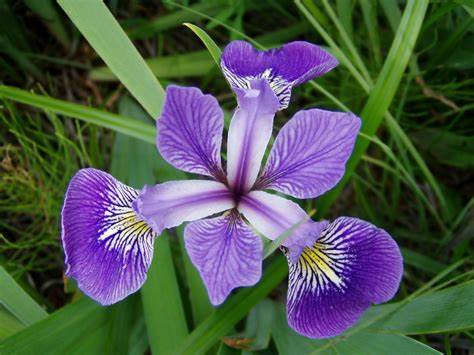

* The Iris dataset is a popular dataset in machine learning and statistics, often used for classification tasks. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The Use of Multiple Measurements in Taxonomic Problems."

### Species Of Iris Flower

The Iris flower consists of the following species;
* Setosa, 
* Versicolor, and 
* Virginica.

### About Iris Dataset
* The Iris dataset contains measurements of various characteristics of three species of iris flowers: 
* Setosa, 
* Versicolor, and 
* Virginica. 
* These characteristics include the lengths and widths of the sepals and petals. The dataset consists of 150 samples, with 50 samples for each species.

### Attributes

Here are the attributes typically included in the Iris dataset:

1. Sepal length (in centimeters)
2. Sepal width (in centimeters)
3. Petal length (in centimeters)
4. Petal width (in centimeters)
5. Species (Setosa, Versicolor, or Virginica)


#### What is the Goal of The Dataset?

* The goal of using the Iris dataset in machine learning is often to train a model to classify iris flowers into one of the three species based on their measurements. 
* It's a classic example of a supervised learning problem, where the species labels serve as the target variable, and the measurements serve as the features used to make predictions.

#### 1.2 Recorgnizing Variables in The Dataset <a id =3></a>

1. <b>Id:</b> Represents the indexes of each of the observation values in the dataset.
1. <b>SepalLength</b> : This variable represents the length of the sepals (the outermost whorl of a flower) of the iris in centimeters. Sepals are the green, leaf-like structures that enclose and protect the flower bud.

2. <b>SepalWidth:</b> This variable represents the width of the sepals of the iris in centimeters. It's measured perpendicular to the length and also in centimeters.

3. <b>PetalLength:</b> Petal length refers to the length of the petals (the innermost whorl of a flower) of the iris in centimeters. Petals are usually the colorful parts of the flower that attract pollinators.

4. <b>PetalWidth:</b> Petal width represents the width of the petals of the iris in centimeters. Similar to sepal width, it's measured perpendicular to the length and also in centimeters.

5.<b>Species:</b> This variable indicates the species of the iris flower. In the Iris dataset, there are three possible species: Setosa, Versicolor, and Virginica. Each sample in the dataset is labeled with one of these species.

* Here's a summary of the variables:

<b>- SepalLength (cm)</b><p>
<b>- SepalWidth (cm)</b><p>
<b>- PetalLength (cm)</b><p>
<b>- PetalWidth (cm)</b><p>
<b>- Species</b> (Iris-Setosa, Iris-Versicolor, Iris-Virginica).


### 2. First Organization<a id=4></a>
#### 2.1 Required Python Libraries<a id=5></a>
#### 2.1.1 Basic Libraries<a id=6></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/iris-csv/Iris.csv


### 2.2 Loading The DataSet<a id = 7></a>

In [2]:
df = pd.read_csv("/kaggle/input/iris-csv/Iris.csv")

In [3]:
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa

### 2.3 Initial Analysis On The Dataset<a id=8></a>

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Finding the shape of the dataframe
print("Shape of dataset:",df.shape)

Shape of dataset: (150, 6)


In [6]:
# Getting to read some relevant info of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.value_counts().sum()

150

In [9]:
# The indexes of the observation values are given, there's no need to keep the 'id' variable.
df.drop(["Id"],axis= 1, inplace =True)

In [10]:
# Since the species variable are from Iris, im going to replace the Iris-
df["Species"] = df["Species"].str.replace("Iris-","")

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.3.1 Output(1)<a id= 9></a>

* There's no Missing values in the observational variables above.
* The Dataset consists of 150 rows and 6 cloumns.
* There's no missing values in the dataset from the first analysis.
* There are numerical data types in the dataset(integer and float) and also an <b>object</b> type.

### 3. Preparation For Exploratory Data Analysis(EDA)<a id=10></a>

### 3.1 Examining Missing Values<a id=11></a>

In [12]:
# Creating a loop to find the missing values in the variables.
isnull_numb = []
for i in df.columns:
    variables = df[i].isnull().sum()
    isnull_numb.append(variables)
pd.DataFrame(isnull_numb,index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


<Axes: >

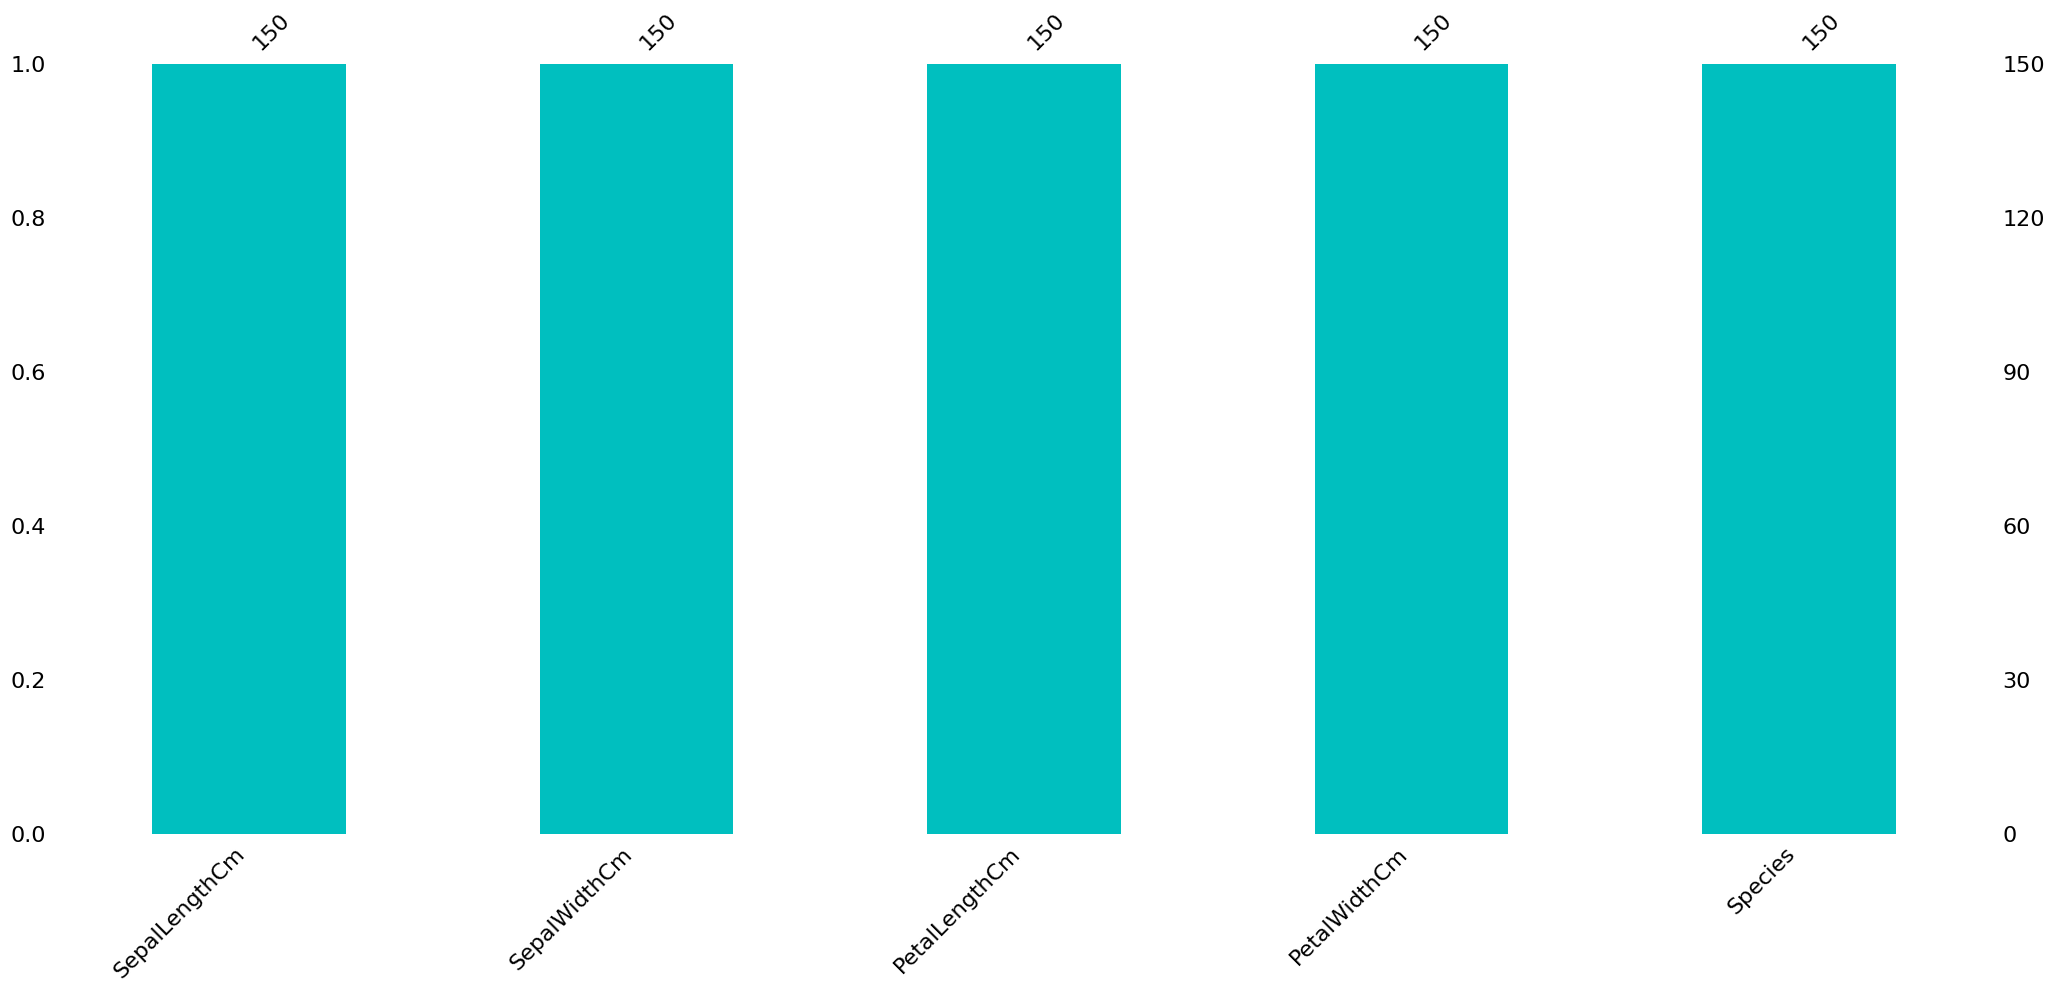

In [13]:
# now Lets visualize the missing data
import missingno
missingno.bar(df, color ="c")

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df["SepalLengthCm"].value_counts()

SepalLengthCm
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

In [16]:
df["SepalWidthCm"].value_counts().sum()

150

### Examining Unique values<a id = 12></a>

In [17]:
# Lets loop throught the dataset to find and create a dataframe for the unique values of the variables.
unique_numb = []
for i in df.columns:
    x = df[i].isnull().sum()
    unique_numb.append(x)
pd.DataFrame(unique_numb, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


### 3.2.1 Analysis Output(2)<a id=13></a>

* In this context, we visualize the graph of the missing values of the variables using the missingno function.

### 3.3 [Separating Varaibles(Numeric or Categorical)<a id=14></a>

* From out table, only our target variable "Species is categorical.

* Since we dont have alot of categorical variables, we are going to iqnore the process of manipulating categorical data.

In [18]:
# Creating a numeric variable
numeric_var = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

In [19]:
# Creating categorical variable.
categoric_var = ["Species"]

* Now lets visualize our numeric variable with dispot

### 3.4 Examining Statistics or Variales<a id=15></a>

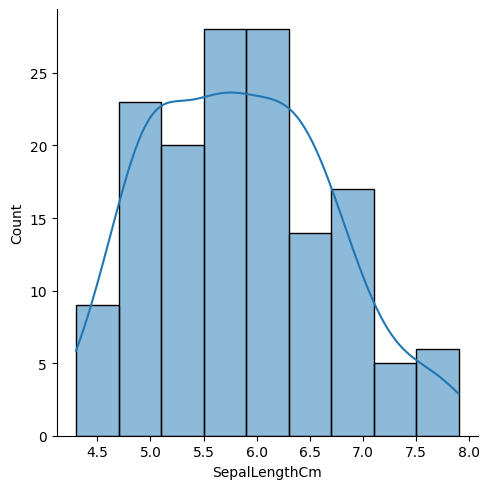

In [20]:
sns.displot(df["SepalLengthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

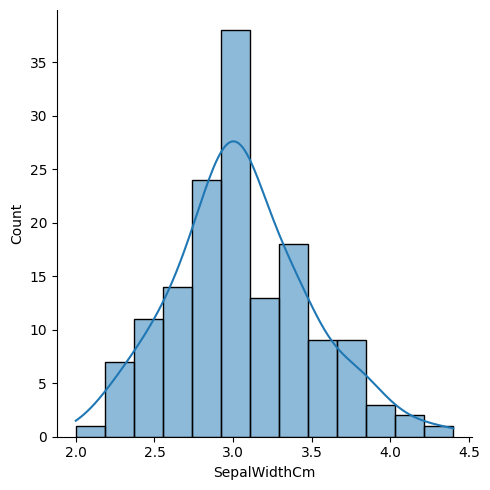

In [21]:
sns.displot(df["SepalWidthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

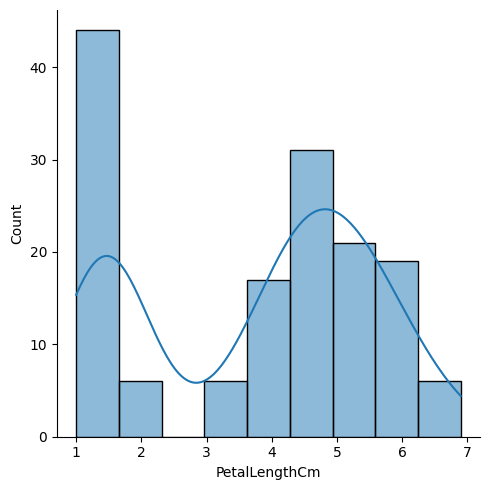

In [22]:
sns.displot(df["PetalLengthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

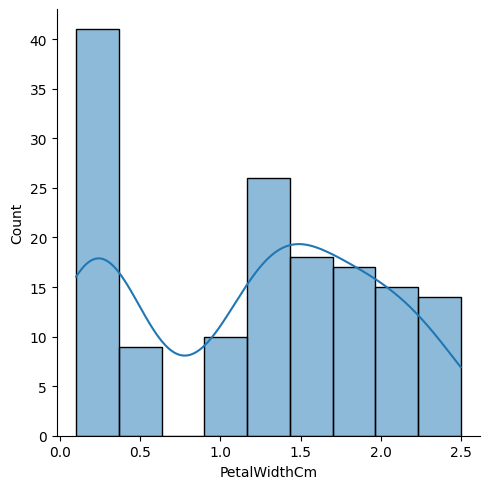

In [23]:
sns.displot(df["PetalWidthCm"], kde = True, **dict(linewidth=1,edgecolor="k"));

### 3.4.1 Output Analysis(3)<a id=16></a>

* From the above analysis, we observed that some of the variables got some outliers.
* The sepals characteristics are also symmetric.
* In the next chapter we will perform EDA.

### 4. Exploratory Data Analysis(EDA)]<a id=17></a>
 

* In this chapter we are going to determine the characteristics of variables.

In [24]:
# Lets first create a numerical column for the Species column
df["Species_Num"] = df["Species"]

In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [26]:
df["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
# Creating a numeric values for the observations in the species column.
df["Species_Num"] = df["Species_Num"].str.replace("setosa","1")
df["Species_Num"] = df["Species_Num"].str.replace("versicolor","2")
df["Species_Num"] = df["Species_Num"].str.replace("virginica","3")


In [28]:
df["Species_Num"] = pd.to_numeric(df["Species_Num"], downcast = "integer")

In [29]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


* After inserting the new cloumn, our object types has now increased to 2. Hence we're going to convert to and integer type.

In [31]:
df["Species_Num"].value_counts()

Species_Num
1    50
2    50
3    50
Name: count, dtype: int64

In [32]:
df["Species_Num"] = pd.to_numeric(df["Species_Num"], downcast = "integer")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


* Done! we now have our new column in an integer type.
* We will now proceed with out Analysis.

### 4.1 Uni-Variate Analysis<a id=18></a>
### 4.1.1 Numerical Variables(Analysis with Displot)<a id=19></a>

In [34]:
numeric_var

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [35]:
numeric_axis_name = ["Sepal Length","Sepal Width","Petal Length","Petal Width"]

In [36]:
list(zip(numeric_var,numeric_axis_name))

[('SepalLengthCm', 'Sepal Length'),
 ('SepalWidthCm', 'Sepal Width'),
 ('PetalLengthCm', 'Petal Length'),
 ('PetalWidthCm', 'Petal Width')]

* Visualization for each of the variables in the numeric

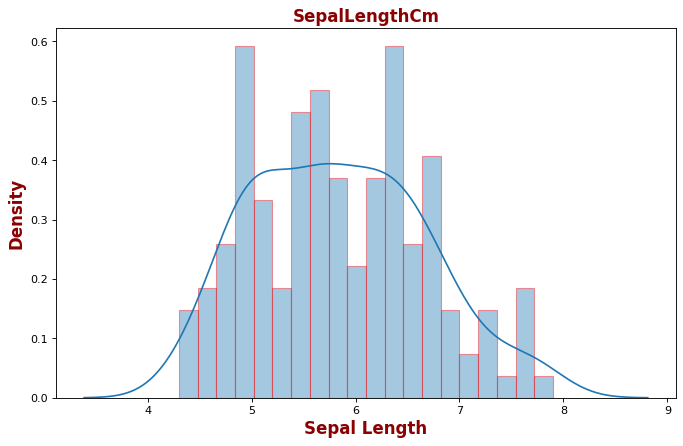

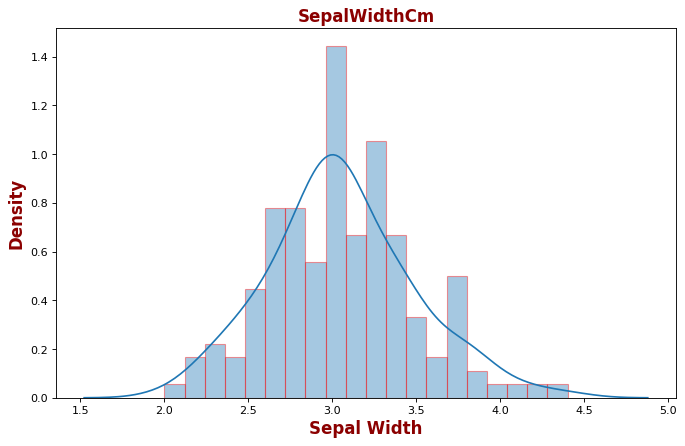

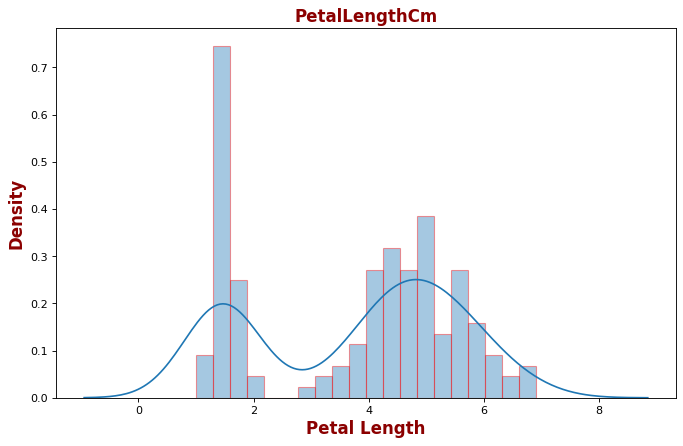

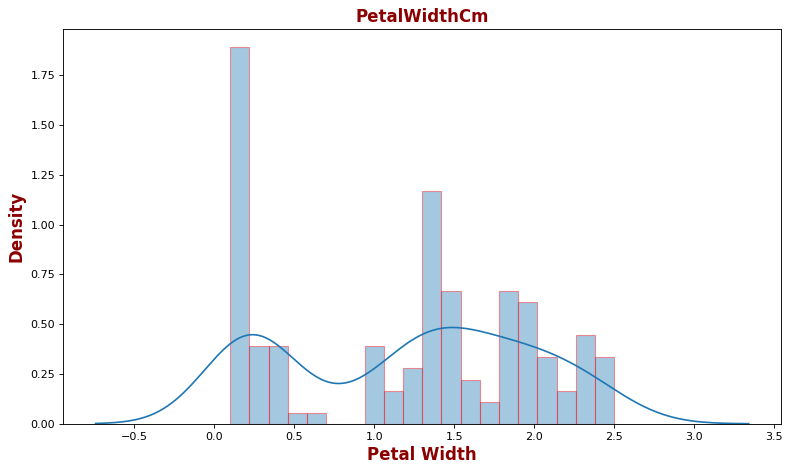

In [37]:
title_font={"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font={"family":"arial","color":"darkred","weight":"bold","size":15}


for i,z in list(zip(numeric_var,numeric_axis_name)):
    plt.figure(figsize = (10,6),dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth=1, edgecolor ="r"), bins = 20);
    
    
    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
#     images layout settings
plt.tight_layout()
plt.show()

### 4.1.1.1 Analysis Output(4) <a id =20></a>

###  4.1.2 Categorical Variables(Analysis with pie chart)<a id=21></a>
     

In [38]:
categoric_var

['Species']

In [39]:
categoric_axis_name = ["Species of Flower"]

In [40]:
list(df["Species_Num"].value_counts())

[50, 50, 50]

In [41]:
list(df["Species_Num"].value_counts().index)

[1, 2, 3]

In [42]:
list(zip(categoric_var,categoric_axis_name))

[('Species', 'Species of Flower')]

* Visualizing The target variable

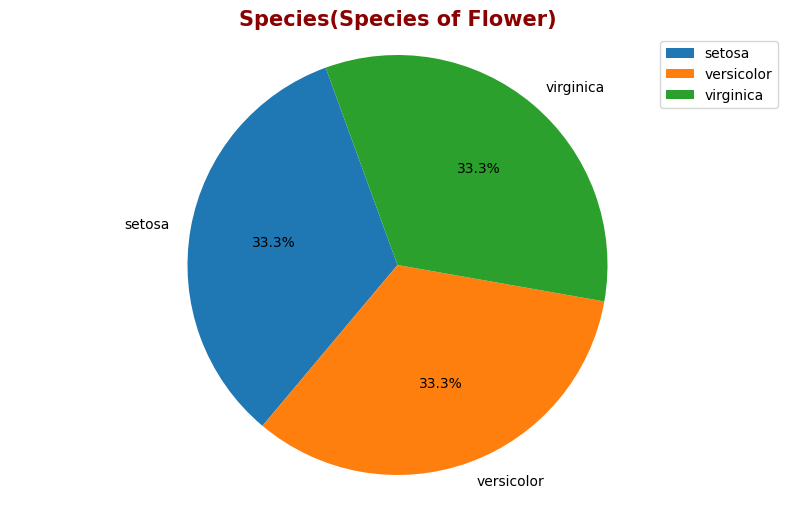

In [43]:
title_font={"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font={"family":"arial","color":"darkred","weight":"bold","size":15}


for i,z in list(zip(categoric_var,categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (10,6))
    
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
#     Creating pie chart axis
    ax.pie(total_observation_values, labels = observation_values, autopct = '%1.1f%%', startangle =110, labeldistance=1.1)
    ax.axis("equal") # creates equal aspect ratio.
    
    
    
    plt.title(i + "(" + z + ")", fontdict = title_font)
    plt.legend()
    plt.show()

### 4.1.2.1 Analysis Output(5)<a id=22></a>

* In this chapter we analyze the characteristic of the only categorical variable in the iris-dataset , which is has to be our target variable.
* The observation values of each Species has equal partition in the piechart(33.3%).

### 4.1.2.2 Examining the Missing Data According to the Analysis Result<a id =23></a>

In [44]:
isnull_numb = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_numb.append(x)
pd.DataFrame(isnull_numb, index=df.columns,columns = ["Total Missing Values"])

,Total Missing Values
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0
Species_Num,0


### 4.2 Bi-Variate Analysis<a id =24></a>
### 4.2.1 Numerical Variables - Target variable(Analysis with FacetGrid)<a id = 25></a>

* Bi-variate Analysis in our case is comparing all the other variables each with the target variable.


In [45]:
numeric_var

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

* We first need to add the target varaible "Species" back to the numeric variables.

In [46]:

numeric_var.append("Species")

In [47]:
numeric_var

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

* We will next Visualize the numeric variables with the target variable and make our analysis.

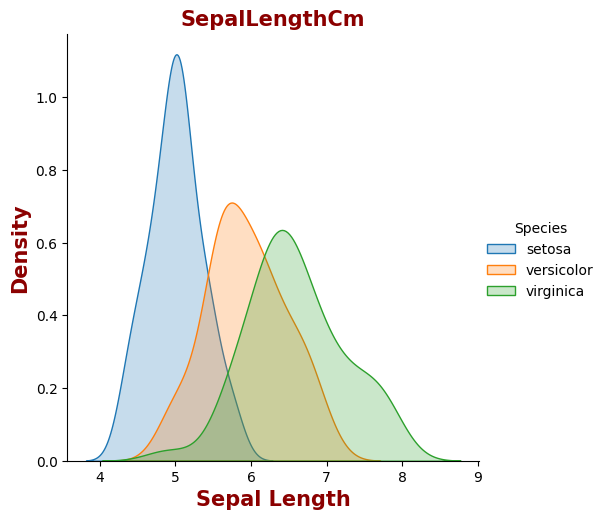

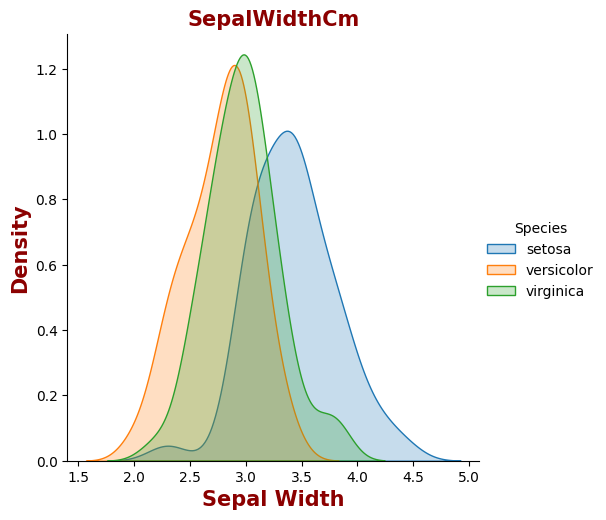

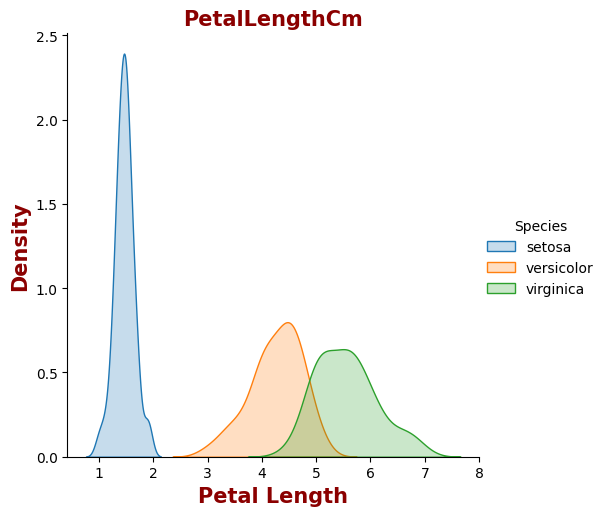

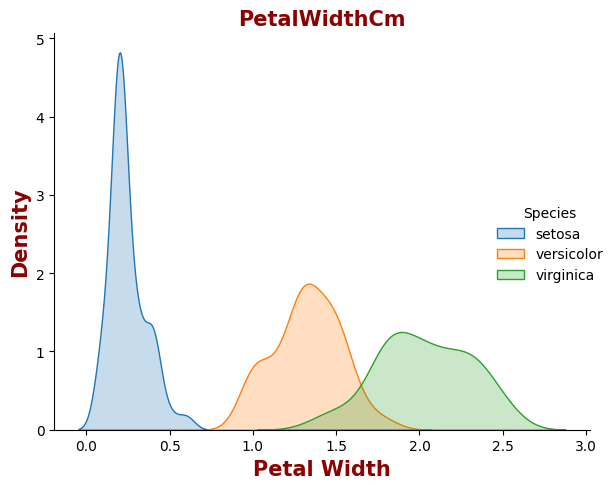

In [48]:
title_font={"family":"arial","color":"darkred","weight":"bold","size":15}
axis_font={"family":"arial","color":"darkred","weight":"bold","size":15}


for i,z in list(zip(numeric_var,numeric_axis_name)):
    graph =sns.FacetGrid(df[numeric_var], hue="Species",height=5, xlim=None,ylim=None)
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()
    
    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
#     images layout settings
plt.tight_layout()
plt.show()

### Examining Numeric variables Among Themselves<a id =26></a>

In [49]:
numeric_var

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [50]:
numeric_var.remove("Species")

In [51]:
df[numeric_var].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* Now lets visualize the numeric variables among each other with a pairplot.


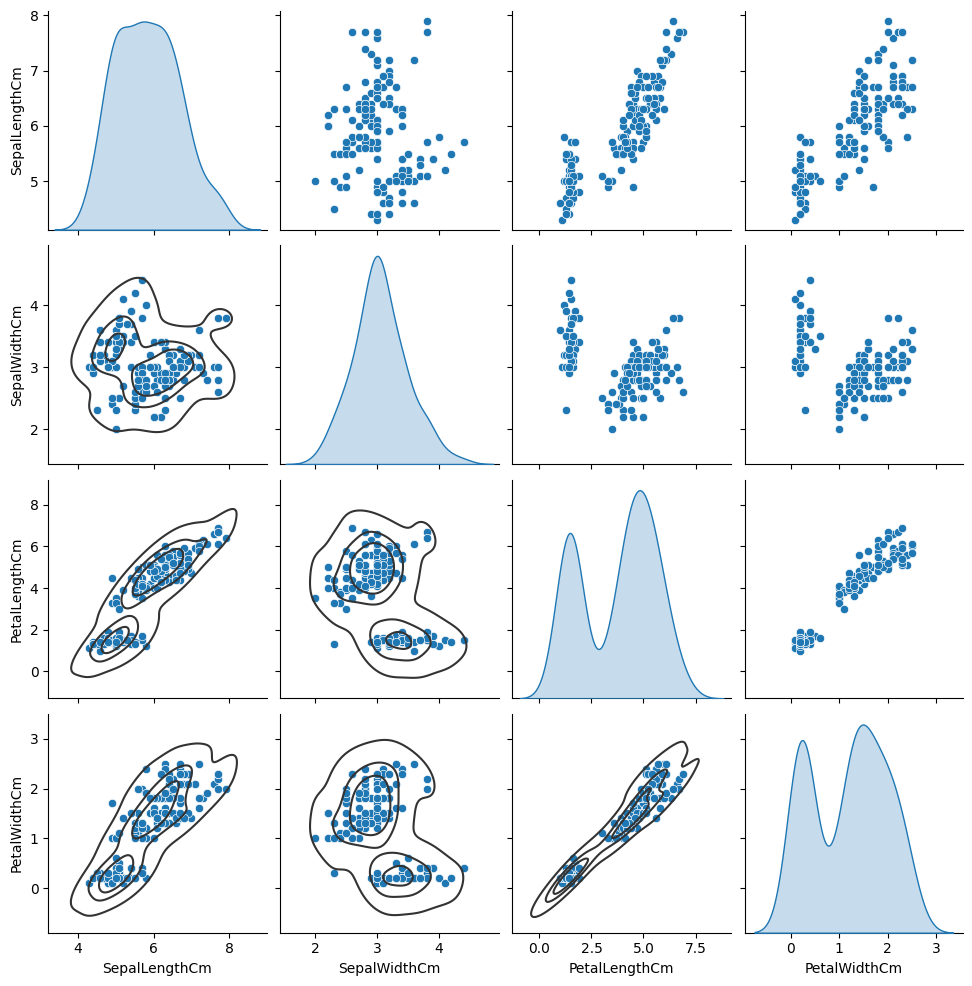

In [52]:
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot,levels = 4, color=".2")
plt.show()

### 4.2.3 Feature Scaling With RobustScaler<a id=27></a>

Understanding RobustScaler:
* Robust to Outliers: Unlike standard scaling methods like MinMaxScaler or StandardScaler, which use the mean and standard deviation, RobustScaler uses median and quartiles, making it robust to outliers. Outliers can heavily influence the mean and standard deviation, leading to poor scaling performance, but they have less effect on the median and quartiles.

In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
robust_scaler = RobustScaler()

In [55]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [56]:
type(scaled_data)

numpy.ndarray

In [57]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333


* The purpose of this scaling method is to scale the distance of the data to a preferred range.

#### 4.2.4 Creating a New DataFrame Using Melt() function<a id=28></a>

In [58]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [59]:
df_new = pd.concat([df_scaled, df.loc[:,"Species"]],axis =1)

In [60]:
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.538462,1.0,-0.842857,-0.733333,setosa
1,-0.692308,0.0,-0.842857,-0.733333,setosa
2,-0.846154,0.4,-0.871429,-0.733333,setosa
3,-0.923077,0.2,-0.814286,-0.733333,setosa
4,-0.615385,1.2,-0.842857,-0.733333,setosa


In [61]:
# Changing the structure of the dataframe using the melt() function
melted_data = pd.melt(df_new, id_vars="Species", var_name = "Variables",value_name="Value")

In [62]:
melted_data

,Species,Variables,Value
0,setosa,SepalLengthCm,-0.538462
1,setosa,SepalLengthCm,-0.692308
2,setosa,SepalLengthCm,-0.846154
3,setosa,SepalLengthCm,-0.923077
4,setosa,SepalLengthCm,-0.615385
...,...,...,...
595,virginica,PetalWidthCm,0.666667
596,virginica,PetalWidthCm,0.400000
597,virginica,PetalWidthCm,0.466667
598,virginica,PetalWidthCm,0.666667


* Visualizing the data with a swarmplot because it ensures that points do bot overlap.

### 4.2.4 Numerical Variables - Target Variable(Analysis with swarmPlot)<a id=29></a>

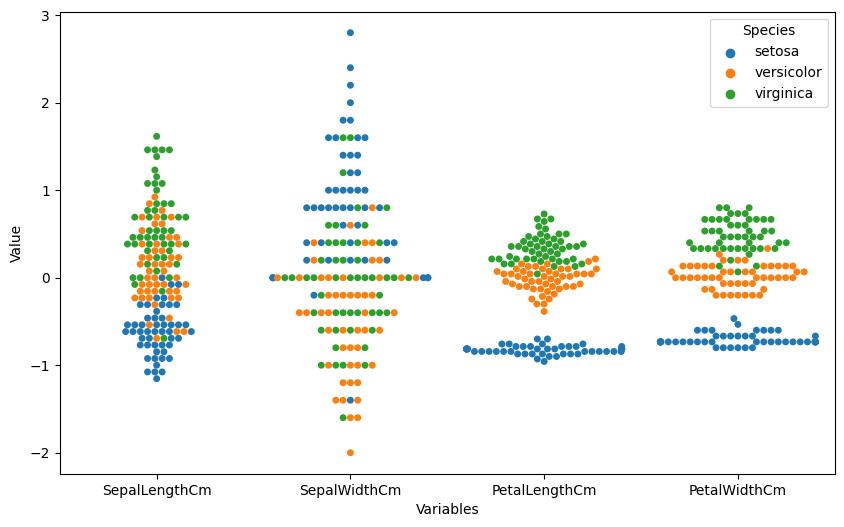

In [63]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="Variables", y = "Value",hue="Species", data=melted_data)
plt.show()

### 4.2.4.1 Output Analysis<a id = 36></a>

* After visualizing our numeric variables and Target variable together with the swarmplot, we relized the following;
1. The colors of the Petal values are evenly distributed which indicates a strong correlation for these two variables.
2. The SepalLenghtcm has an average correlation whereas the SepalWidthcm has a vey low correlation.

### 4.2.5 Numerical Variables - Target Variable(Analysis with BoxPlot)<a id=30></a>

In [64]:
categoric_var

['Species']

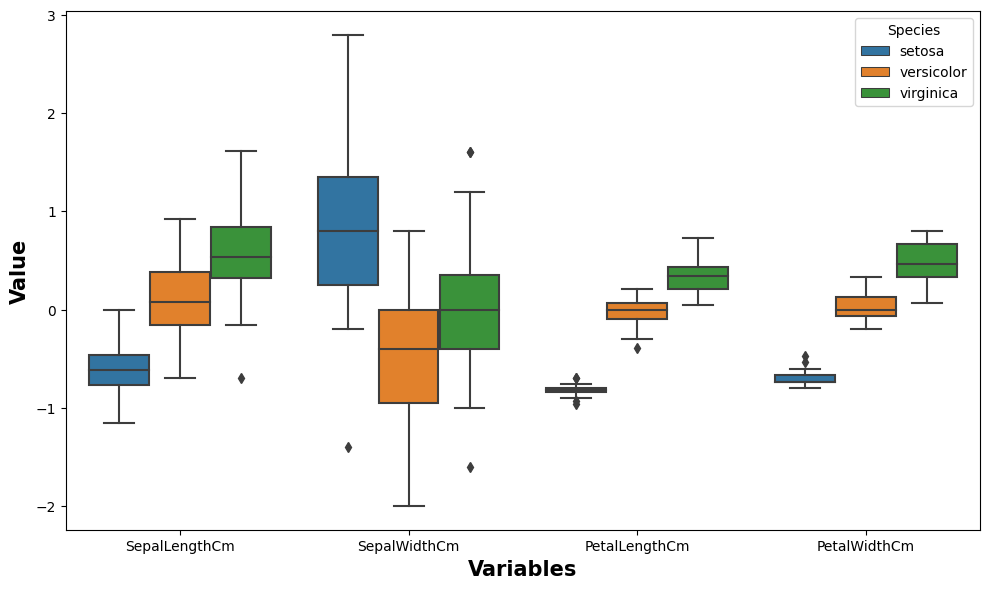

In [65]:
axis_font = {"family":"arial","color":"black", "weight":"bold","size":15}

# we now visualize all the variables in the dataset
for i in df[categoric_var]:
    df_new = pd.concat([df_scaled, df.loc[:,i]], axis =1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = "variables",value_name = "value")
    
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = "variables", y = "value",hue = i, data = melted_data)
    
    plt.xlabel("Variables", fontdict = axis_font)
    plt.ylabel("Value", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

### 4.2.6 Relationship Between All Variables(Analysis with Heatmap)<a id=31></a>

In [66]:
df_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


In [67]:
categorical_var_num = df["Species_Num"]

In [68]:
categorical_var_num.head()

0    1
1    1
2    1
3    1
4    1
Name: Species_Num, dtype: int8

In [69]:
# Lets add the target variable to the scaled dataframe
df_with_target= pd.concat([df_scaled, df[categoric_var]],axis =1)

In [70]:
df_with_target

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.538462,1.0,-0.842857,-0.733333,setosa
1,-0.692308,0.0,-0.842857,-0.733333,setosa
2,-0.846154,0.4,-0.871429,-0.733333,setosa
3,-0.923077,0.2,-0.814286,-0.733333,setosa
4,-0.615385,1.2,-0.842857,-0.733333,setosa
...,...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667,virginica
146,0.384615,-1.0,0.185714,0.400000,virginica
147,0.538462,0.0,0.242857,0.466667,virginica
148,0.307692,0.8,0.300000,0.666667,virginica


In [71]:
# A little variable assignment  here
df["Species"] = df["Species_Num"]

In [72]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


In [73]:
df.drop(["Species_Num"], axis = 1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


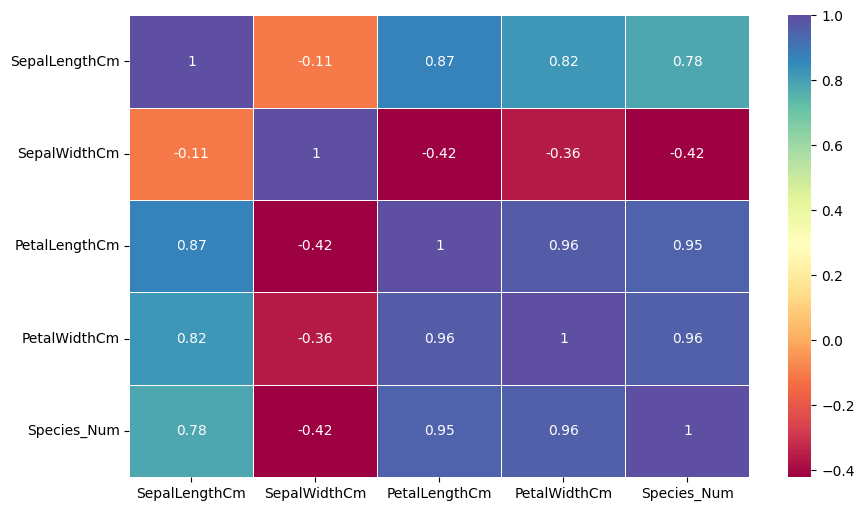

In [74]:
# Determing the correction of all variables using the heatmap
plt.figure(figsize = (10,6))
corr_matrix = df.corr().drop(["Species"],axis = 1).drop(["Species"],axis =0)
sns.heatmap(corr_matrix, cmap="Spectral",annot=True,linewidth =0.5)
plt.show()

### 4.2.6.1 Analysis Output(6)<a id =32></a>

* Negative numbers indicates negative correlation between the variables, meaning there's an inverse proportionality.
* Positive numbers also indicates positive correlation between the variables, meaning there is a direct proportionality.
* Another Condition here is something we call <b>Multicollinearity</b>.
* <b>Multicollinearity:</b>"PetalLengthCm" is highly correlated with another feature (e.g., "PetalWidthCm" or "SepalLengthCm"), it could lead to multicollinearity issues. Multicollinearity can affect the stability and interpretability of the model coefficients. Dropping one of the highly correlated features can help mitigate multicollinearity,in this case PetalLength.

### 5. Preparing for Modelling<a id=33></a>

### 5.1 Droping Columns with Low Correlation<a id = 34></a>

In [75]:
df.drop(["PetalLengthCm","Species_Num"], axis = 1, inplace =True)

In [76]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,1
1,4.9,3.0,0.2,1
2,4.7,3.2,0.2,1
3,4.6,3.1,0.2,1
4,5.0,3.6,0.2,1


 ### 5.2 Strugling With Outliers<a id=35></a>

* One common approach we going to use is to winsorize the data to handle outliers and then perform Robust Scaling to scaled the data to scale it.

### 5.2.1 Visulaizing Outliers<a id=36></a>

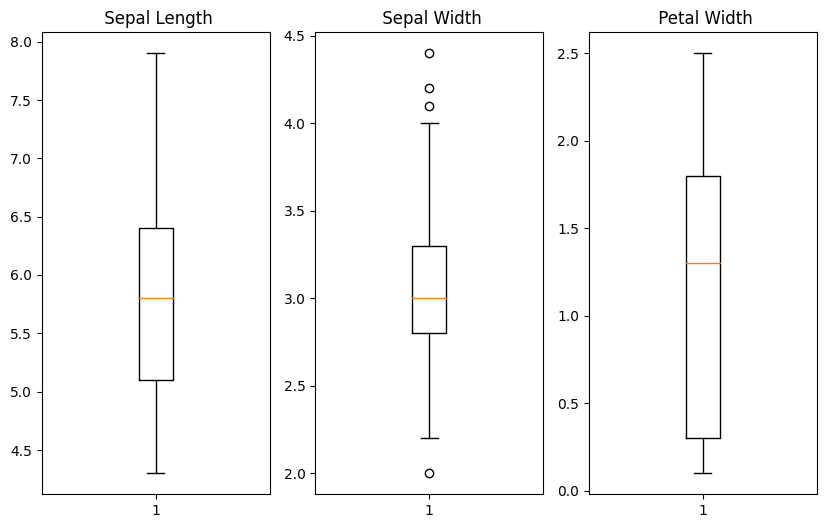

In [77]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,6))

# For Sepal Length
ax1.boxplot(df["SepalLengthCm"])
ax1.set_title(" Sepal Length")

# For  Sepal Length
ax2.boxplot(df["SepalWidthCm"])
ax2.set_title(" Sepal Width")

# Petal Width
ax3.boxplot(df["PetalWidthCm"])
ax3.set_title(" Petal Width")


plt.show()

* <b>Sepal Length:</b>The Boxplot above shows that there are outliers in only the Sepal Length of the variables.
* The image is prone to normal distribution.
* The values are highly concentrated to the Left.
* There's a skew to the right.

### 5.2.2 Dealing with Outliers<a id =37></a>

### 5.2.2.1 SepalWidthCm <a id= 38></a>

In [78]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

* <b>Z-Score Method:</b> The Z-score of a data point measures how many standard deviations it is away from the mean. Data points with a Z-score above a certain threshold (e.g., 3 or -3) are considered outliers.
 * The <b>winsorize method</b> in SciPy is used to winsorize data, which involves setting extreme values (outliers) to specified percentiles of the data distribution. Winsorizing is a robust method for handling outliers by replacing extreme values with less extreme ones.
 * The <b>Sepal Length</b> is close to normal distribution but has outliers.

In [79]:
z_score_sepalWidth = zscore(df["SepalWidthCm"])
for threshold in range(1,3):
    print("Threshold Value:{}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_score_sepalWidth>threshold)[0])))
    print("-----------------------------")

Threshold Value:1
Number of Outliers: 24
-----------------------------
Threshold Value:2
Number of Outliers: 4
-----------------------------


* Since Our is skewed to the left we will use the inter-quatile range

In [80]:
# Now Lets create a function to detect the outliers
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3-q1
    lower_v = q1 - (1.5*diff)
    upper_v = q3+(1.5*diff)
    return df[(df[var]<lower_v)|df[var]>upper_v]

In [81]:
SepalWidth_out = iqr(df, "SepalWidthCm")

In [82]:
SepalWidth_out

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species


In [83]:
# The lowest values on the SepalWidthCm is 4.0
df[df["SepalWidthCm"]<4.0].SepalWidthCm.max()

3.9

In [84]:
#  Lets find the percentile 4.0 fall into
winsorize_percentile_SepalWidth = (stats.percentileofscore(df["SepalWidthCm"], 4))/100
print(winsorize_percentile_SepalWidth)

0.98


* The percentile while the 4.0 fall into is 98%.

In [85]:
winsorize_SepalWidth = winsorize(df.SepalWidthCm, (0, (1-winsorize_percentile_SepalWidth)))

In [86]:
winsorize_SepalWidth

masked_array(data=[3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7,
                   3.4, 3. , 3. , 4. , 4. , 3.9, 3.5, 3.8, 3.8, 3.4, 3.7,
                   3.6, 3.3, 3.4, 3. , 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4. ,
                   4. , 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3, 3.2, 3.5,
                   3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8,
                   2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9, 3.1,
                   3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
                   3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3,
                   3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5,
                   2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6,
                   3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.2, 3.2,
                   2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
                   2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
                   3.2, 3.3, 3. , 2.5,

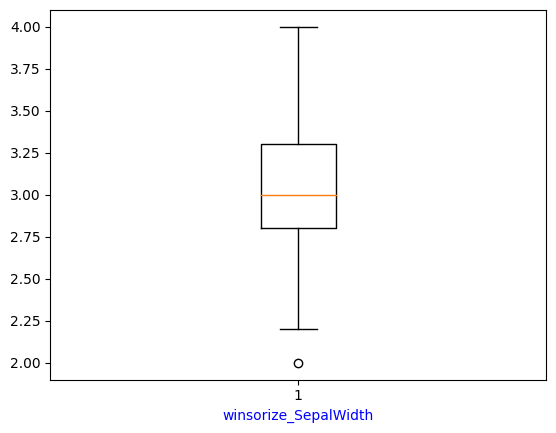

In [87]:
# Lets visualize our new box
plt.boxplot(winsorize_SepalWidth)
plt.xlabel("winsorize_SepalWidth", color="b")
plt.show()

In [88]:
df["winsorize_SepalWidth"] = df["SepalWidthCm"]

In [89]:
df.drop(["SepalWidthCm"],axis =1, inplace = True)

In [90]:
df.head()

,SepalLengthCm,PetalWidthCm,Species,winsorize_SepalWidth
0,5.1,0.2,1,3.5
1,4.9,0.2,1,3.0
2,4.7,0.2,1,3.2
3,4.6,0.2,1,3.1
4,5.0,0.2,1,3.6


In [91]:
# # Now Lets create a function to detect the outliers
# def iqr(df, var):
#     q1 = np.quantile(df[var], 0.25)
#     q3 = np.quantile(df[var], 0.75)
#     diff = q3-q1
#     lower_v = q1 - (1.5*diff)
#     upper_v = q3 - (1.5*diff)
#     return df[(df[var]<lower_v)|df[var]>upper_v]

In [92]:
# winsorize_SepalWidth_out = iqr(df, "winsorize_SepalWidth")

In [93]:
# print(winsorize_SepalWidth_out)

In [94]:
df.head()

,SepalLengthCm,PetalWidthCm,Species,winsorize_SepalWidth
0,5.1,0.2,1,3.5
1,4.9,0.2,1,3.0
2,4.7,0.2,1,3.2
3,4.6,0.2,1,3.1
4,5.0,0.2,1,3.6


* Now what we are going to do with this outlier is to limit the number of them in the box.

* From the above we now have a percentile of 100.

### 5.3 Determining Distribution of Numeric Variables<a id =39></a>

* We going to make some inference from the distribution in the data and approximate them for a normal distribution.
* We going to check the distribution using histplot

In [95]:
df.head()

,SepalLengthCm,PetalWidthCm,Species,winsorize_SepalWidth
0,5.1,0.2,1,3.5
1,4.9,0.2,1,3.0
2,4.7,0.2,1,3.2
3,4.6,0.2,1,3.1
4,5.0,0.2,1,3.6


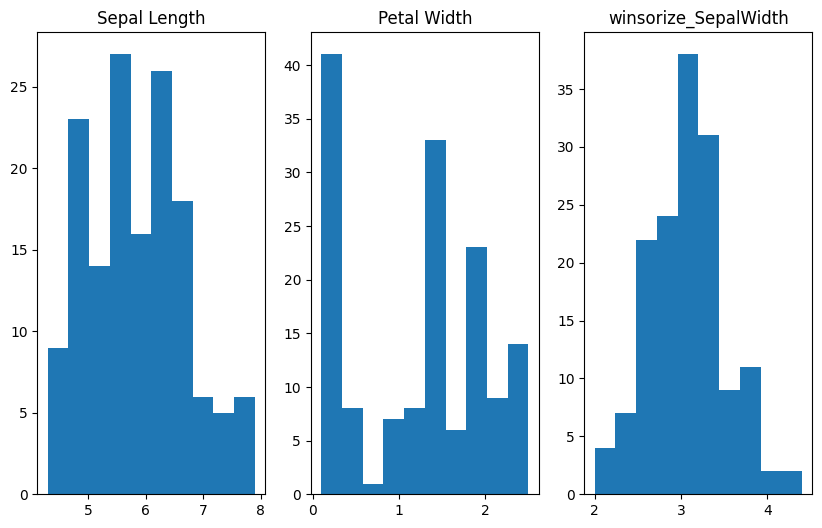

In [96]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (10,6))

ax1.hist(df["SepalLengthCm"])
ax1.set_title("Sepal Length")

ax2.hist(df["PetalWidthCm"])
ax2.set_title("Petal Width")

ax3.hist(df["winsorize_SepalWidth"])
ax3.set_title("winsorize_SepalWidth")


plt.show()

In [97]:
# Seeing the determinations numerically
df[["SepalLengthCm","PetalWidthCm","winsorize_SepalWidth"]].agg(["skew"]).transpose()

,skew
SepalLengthCm,0.314911
PetalWidthCm,-0.104997
winsorize_SepalWidth,0.334053


* The values are the skewness value of the numerical variables.
* Almost symmetrical distribution if its between -0.5 and 0.5.
* Moderate skew if it between -0.5 and +1.0
* Very skew distribution if its between -1.0 and 1.0.

* We can see the dataframe of the variables has all their corresponding values between -0.5 and 0.5, which indicates <b>"Almost symmetrical dritribution"</b>.

###  5.4 Feature Scaling with Robust Scaler Method<a id =40></a>


* Feature scaling with Robust Scaler has the following benefits;

1. **Outlier Handling**: Robust scaling techniques help reduce the impact of outliers on the kNN algorithm by making it less sensitive to extreme values. This ensures that outliers do not disproportionately influence the distance calculations used by kNN.

2. **Improved Distance Metrics**: Robust scaling ensures that distance calculations in kNN are more accurate by normalizing feature scales and reducing the influence of features with larger scales. This leads to more reliable nearest neighbor assignments and better clustering of data points.

3. **Balanced Feature Contribution**: Scaling techniques ensure that all features contribute proportionally to the distance calculations in kNN. This prevents features with larger scales from dominating the distance metric and ensures a more balanced influence of features on the algorithm's predictions.

4. **Enhanced Generalization**: By reducing the impact of outliers and normalizing feature scales, robust scaling techniques help create a more generalized model. This enables the kNN algorithm to perform well on unseen data and reduces the risk of overfitting to the training data.

In [98]:
df_copy = df.copy()
df_copy.head()

,SepalLengthCm,PetalWidthCm,Species,winsorize_SepalWidth
0,5.1,0.2,1,3.5
1,4.9,0.2,1,3.0
2,4.7,0.2,1,3.2
3,4.6,0.2,1,3.1
4,5.0,0.2,1,3.6


In [99]:
# Creating a new list of numeric variables
new_numeric = ["SepalLengthCm","PetalWidthCm","winsorize_SepalWidth"]

In [100]:
robust_Scaler = RobustScaler()

In [101]:
df_copy[new_numeric] = robust_Scaler.fit_transform(df_copy[new_numeric])

In [102]:
df_copy.head()

,SepalLengthCm,PetalWidthCm,Species,winsorize_SepalWidth
0,-0.538462,-0.733333,1,1.0
1,-0.692308,-0.733333,1,0.0
2,-0.846154,-0.733333,1,0.4
3,-0.923077,-0.733333,1,0.2
4,-0.615385,-0.733333,1,1.2


### 5.5 Separating Data into Training and Test sets<a id=41></a>


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x = df_copy.drop(["Species"],axis = 1)
y = df_copy[["Species"]]

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [106]:
x_train.head()

,SepalLengthCm,PetalWidthCm,winsorize_SepalWidth
4,-0.615385,-0.733333,1.2
32,-0.461538,-0.800000,2.2
142,0.000000,0.400000,-0.6
85,0.153846,0.200000,0.8
86,0.692308,0.133333,0.2


In [107]:
y_train.head()

,Species
4,1
32,1
142,3
85,2
86,2


In [108]:
print(f"x_train:{x_train.shape[0]}")
print(f"x_test:{x_test.shape[0]}")
print(f"y_train:{y_train.shape[0]}")
print(f"x_test:{x_test.shape[0]}")

x_train:112
x_test:38
y_train:112
x_test:38


### 6. Modelling<a id = 42></a>

### KNN Algorithm

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
k = 3
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(x_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=3)

In [111]:
# Lets make some prediction after fitting our model
y_pred = knn_model.predict(x_test)

In [112]:
y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1], dtype=int8)

* Lets check the accuracy score of the model

In [113]:
from sklearn import metrics

In [114]:
print("Accuracy Score is:", metrics.accuracy_score(y_pred,y_test))

Accuracy Score is: 1.0


* Our Model give and accuracy percentage of 100.

### Hyperparameter Optimization

* For practical sake we are going to use the hyper-parameter optimization, since our model's already 100% performing it wouldn't be really neccesary to use.

* Example of optimization methods includes;
1. **Grid Search**: Exhaustively searches through all specified hyperparameter combinations. Simple but computationally expensive.

2. **Random Search**: Randomly samples hyperparameter values and evaluates model performance. More computationally efficient than grid search.

3. **Bayesian Optimization**: Uses probabilistic models to guide the search for promising hyperparameter values. Effective for high-dimensional and expensive optimization problems.

* In my case im going to use the Grid Search Method


In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
knn_model2 = KNeighborsClassifier()

In [117]:
knn_params = {"n_neighbors":np.arange(1,25),
             "metric": ["minkowski","euclidean","manhattan"],
             "weights":["uniform","distance"]
             }

In [118]:
knn_cv_model = GridSearchCV(estimator = knn_model2, param_grid = knn_params,cv = 10)

In [119]:
knn_cv_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [120]:
knn_cv_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

* The grid search method is giving us the best parameters to be used for a more accurate and consistent model.

In [121]:
knn_tuned = KNeighborsClassifier(n_neighbors = 9, metric ="manhattan", weights = "uniform")

In [122]:
knn_tuned.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [123]:
y_pred = knn_tuned.predict(x_test)
y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 3, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1], dtype=int8)

In [124]:
# print("Accuracy Score after Hyper-paramter optimization is: ",metrics.accuracy_score(y_pred,y_train))